# Import

In [1]:
import tensorflow as tf #pip3 install tensorflow 
from tensorflow import keras
import os
import numpy as np
import cv2 as cv             # opencv
from matplotlib import pyplot as plt

import imghdr
from tensorflow.keras import regularizers

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

print(tf.__version__)
import os
os.path.abspath(os.getcwd())

2.6.2


'/Users/lavenderyin/Desktop'

# Read Dataset

In [2]:
#Read images and labels
path ='/Users/lavenderyin/Desktop/archive/training'#path
path2 ='/Users/lavenderyin/Desktop/archive/validation'#path
train_images = []  # place training images
train_label = []  # place tranining labels
test_images = []  # place testing images
test_label = []  # place testing labels
Filelist = []
Filelist_test = []
y_label_list=['n0', 'n7', 'n9', 'n8', 'n6', 'n1', 'n4', 'n3', 'n2', 'n5']
imgType_list = {'jpg','bmp','png','jpeg','rgb','tif'}
#Read traning images
for home, dirs, files in os.walk(path):# The nested for loop read in file names with path
    for filename in files:    
        Filelist.append(os.path.join(home, filename))# put it in filelist
        
for file in Filelist:
    if imghdr.what(file) in imgType_list:#determine whether it is an image type document
        img_BGR = cv.imread(file)#read in images
        img_RGB = cv.cvtColor(img_BGR, cv.COLOR_BGR2RGB)  # convert color to RGB
        img_RGB = cv.resize(img_RGB, (300, 300), interpolation=cv.INTER_AREA)#Resize image to 300*300
        train_images.append(img_RGB)  # append image array in train_images
        train_label.append({train_label for train_label in y_label_list if train_label in file})
          # append corresponding labels into train_label 

#Read in testing images
for home1, dirs1, files1 in os.walk(path2):
    for filename1 in files1:    
        Filelist_test.append(os.path.join(home1, filename1))
        
for file1 in Filelist_test:
    if imghdr.what(file1) in imgType_list:#determine whether it is an image type document
        img_BGR_test = cv.imread(file1)
        img_RGB_test = cv.cvtColor(img_BGR_test, cv.COLOR_BGR2RGB)  # convert color to RGB
        img_RGB_test = cv.resize(img_RGB_test, (300, 300), interpolation=cv.INTER_AREA)
        
        test_images.append(img_RGB_test)  # append image array in test_images
        test_label.append({test_label for test_label in y_label_list if test_label in file1})  # append corresponding labels into test_label 

 

train_labels=[int("".join(list(filter(str.isdigit,x))))for x, in train_label]#extract only numbers as labels
test_labels=[int("".join(list(filter(str.isdigit,x))))for x, in test_label]
train_images=np.array(train_images)#convert image to numPy
test_images=np.array(test_images)
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

从 /Users/lavenderyin/Desktop/archive/training 读取到 1092 张图片
从 /Users/lavenderyin/Desktop/archive/validation 读取到 270 张图片


In [3]:
#shuffle images
np.random.seed(110)
np.random.shuffle(train_images)
np.random.seed(110)
np.random.shuffle(train_labels)

In [4]:
 #Define class name corresponding to the digital label
class_names = ['mantled_howler', 'patas_monkey', 'bald_uakari', 'japanese_macaque', 'pygmy_marmoset',
               'white_headed_capuchin', 'silvery_marmoset', 'common_squirrel_monkey', 'black_headed_night_monkey','nilgiri_langur']
 

# Browsing the data

The following code indicates that there are 1092 images in the training set, and each image has 300*300 pixels
For testing set, there are 270 images with a 300*300 pixels

In [5]:
test_images.shape
test_images

array([[[[201, 186, 150],
         [197, 184, 133],
         [196, 184, 126],
         ...,
         [142, 165, 125],
         [146, 174, 123],
         [141, 172, 126]],

        [[195, 179, 140],
         [197, 185, 130],
         [192, 176, 126],
         ...,
         [129, 158, 120],
         [124, 155, 111],
         [133, 162, 120]],

        [[197, 181, 130],
         [201, 186, 126],
         [198, 180, 125],
         ...,
         [120, 154, 116],
         [123, 158, 113],
         [129, 161, 108]],

        ...,

        [[113, 150,  83],
         [110, 151,  83],
         [111, 153,  89],
         ...,
         [ 57,  93,  22],
         [ 44,  85,  18],
         [ 46,  90,  25]],

        [[115, 153,  88],
         [111, 152,  86],
         [112, 153,  90],
         ...,
         [ 74, 110,  27],
         [ 63, 103,  19],
         [ 65, 105,  28]],

        [[115, 155,  91],
         [114, 156,  91],
         [114, 156,  92],
         ...,
         [ 82, 115,  50],
        

In [6]:
len(train_labels)

1092

In [7]:
train_labels

array([6, 3, 0, ..., 8, 0, 7])

In [8]:
test_images.shape

(270, 300, 300, 3)

In [9]:
len(test_labels)

270

# Data Preprocessing
The previous matrix shows that pixels are between 0 to 255

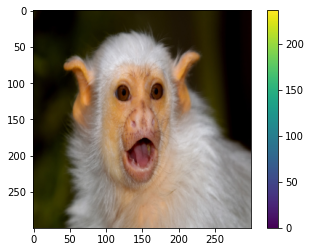

In [10]:
plt.figure()
plt.imshow(train_images[0])#draw the first image
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# standardize the data
#convert [0, 255] range integers to [0, 1] range floats
train_images = train_images / 255.0

test_images = test_images / 255.0


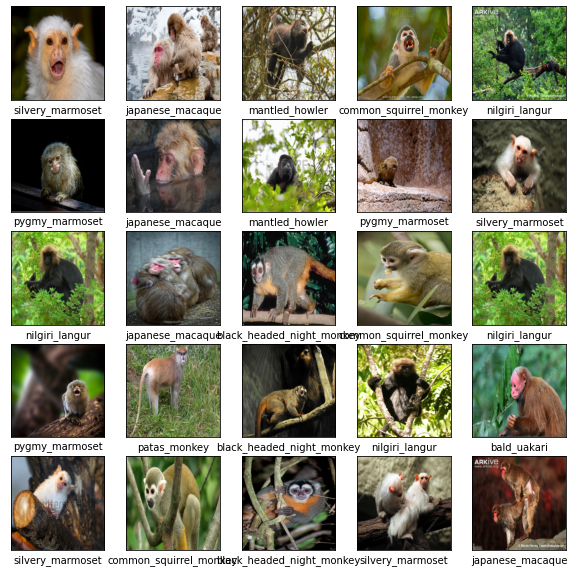

In [12]:
# to check whether we have the right format
#show the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# OvO(One vs One) Classifiation

In [13]:

from sklearn.linear_model import LogisticRegression

#reshape the dataset to 2-d array
train_images_2 = (train_images.reshape(train_images.shape[0],train_images.shape[1]*train_images.shape[2]*train_images.shape[3]))
test_images_2 = (test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2]*test_images.shape[3]))
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
# 'multinomial'：refers to OvO methods；

log_reg2.fit(train_images_2, train_labels)# fit the model
log_reg2.score(test_images_2, test_labels)#accuracy score of OvO








0.5851851851851851

# Constructing CNN Models

In [14]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",
                      input_shape=(300,
                                  300,
                                  3)),
    keras.layers.RandomRotation(0.1),#preventing overfitting
    keras.layers.RandomZoom(0.1),
  ]
)
num_classes = 10
#The sequencial model consists of three convolution blocks(tf.keras.layers.Conv2D) with a max pooling layer in each of them
model = keras.Sequential([
  data_augmentation,
  #layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  keras.layers.Conv2D(16, 3, padding='same',activation='relu'),
  #keras.layers.Conv2D(16, 3, padding='same', kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same',activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same',activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),#activated by a ReLu activation function "rule"
  keras.layers.Dense(num_classes)
])





# Model Compiling
The following code adds a loss function, a optimizer, and a metrics(accuracy level in this case)

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

In [16]:
#load training data and fit the model
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
35/35 [==============================] - 36s 923ms/step - loss: 2.3682 - accuracy: 0.1374
Epoch 2/50
35/35 [==============================] - 30s 864ms/step - loss: 1.9122 - accuracy: 0.3196
Epoch 3/50
35/35 [==============================] - 29s 829ms/step - loss: 1.5836 - accuracy: 0.4478
Epoch 4/50
35/35 [==============================] - 28s 803ms/step - loss: 1.3678 - accuracy: 0.5339
Epoch 5/50
35/35 [==============================] - 28s 804ms/step - loss: 1.2980 - accuracy: 0.5430
Epoch 6/50
35/35 [==============================] - 28s 813ms/step - loss: 1.1331 - accuracy: 0.6145
Epoch 7/50
35/35 [==============================] - 28s 801ms/step - loss: 1.0743 - accuracy: 0.6328
Epoch 8/50
35/35 [==============================] - 28s 801ms/step - loss: 1.0139 - accuracy: 0.6484
Epoch 9/50
35/35 [==============================] - 28s 797ms/step - loss: 0.9859 - accuracy: 0.6538
Epoch 10/50
35/35 [==============================] - 29s 813ms/step - loss: 0.9119 - accura

# Evaluate the accuracy level

Evaluate the accuracy level on testing data

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

9/9 - 3s - loss: 1.3311 - accuracy: 0.7185

Test accuracy: 0.7185184955596924


# Making predictions

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)# predict the index for testing images and put it in predictions

In [20]:
predictions[0]

array([3.0161157e-01, 5.6511660e-11, 1.5318216e-14, 3.1684264e-19,
       9.8919631e-14, 4.8060977e-01, 6.2654476e-10, 3.6416492e-09,
       2.0738582e-06, 2.1777660e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

5

In [22]:
test_labels[0]

0

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Validating Results

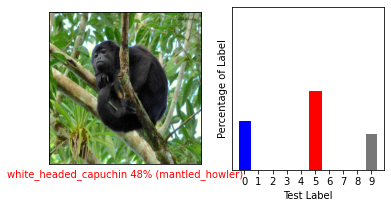

In [29]:
# the following image is the prediction result with both prediction image and labels for the first image
# the red represents wrong predictions and the blue represents right predictions
#the x-axis represents test labels and the y-axis represents the label prediction percentages
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.xlabel('Test Label')
plt.ylabel("Percentage of Label")
plt.show()

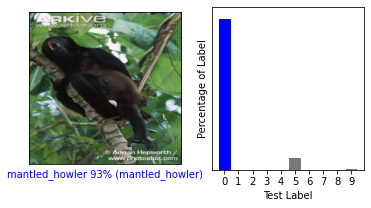

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.xlabel('Test Label')
plt.ylabel("Percentage of Label")
plt.show()

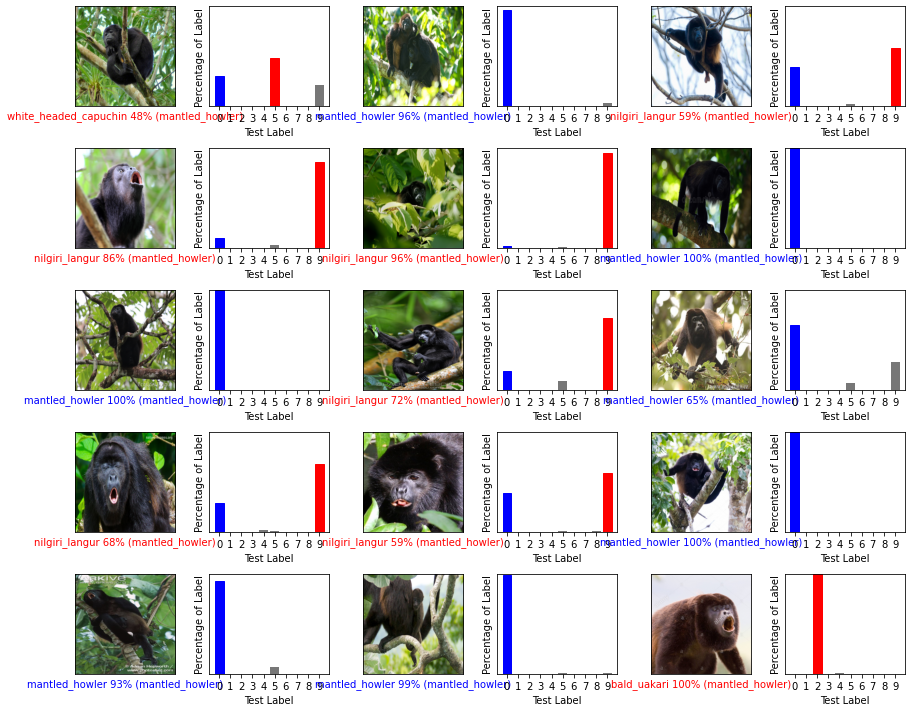

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
  plt.xlabel('Test Label')
  plt.ylabel("Percentage of Label")
plt.tight_layout()

plt.show()